# Exploratory Data Analysis of Walmart Data

First we import our libraries and the data:

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# features

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [55]:
features2 = features.copy()
features2.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],1, inplace = True)
joined = features2.merge(stores, left_on = 'Store', right_on ='Store')
joined.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


Which variables appear to be continuous? Categorical? Sparsely Populated? For example, store is a number, but it indicates a categorical 
variable for a specific store. We can update those data types here.

In [4]:
features['Store'] = pd.Categorical(features.Store)

In [5]:
Date = set(features.Date)
print (sorted(Date))
len(Date)

['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23', '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16', '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13', '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10', '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08', '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05', '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03', '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31', '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28', '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25', '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25', '2011-04-01', '2011-04-08', '2011-04-15', '2011-04-22', '2011-04-29', '2011-05-06', '2011-05-13', '2011-05-20', '2011-05-27', '2011-06-03', '2011-06-10', '2011

182

Logged every 7 days from 2010-02-05 to 2013-07-26 (182 days)

C:\Users\mdosani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mdosani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mdosani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


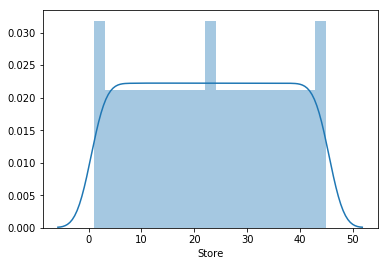

In [6]:
sns.distplot(features.Store)
plt.show()

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


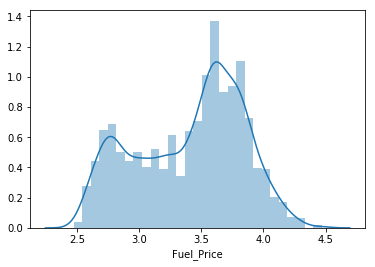

In [7]:
sns.distplot(features.Fuel_Price)
plt.show()

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


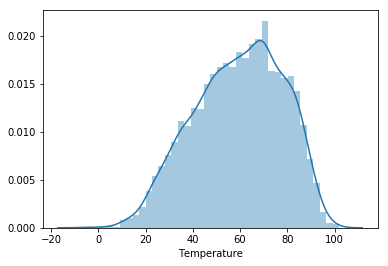

In [8]:
sns.distplot(features.Temperature)
plt.show()

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


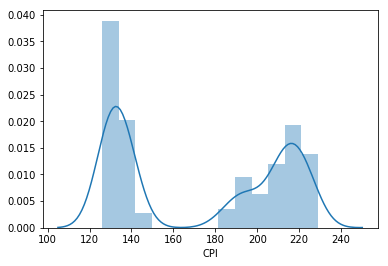

In [9]:
CPI = features[features.CPI.notnull()].CPI
sns.distplot(CPI)
plt.show()

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


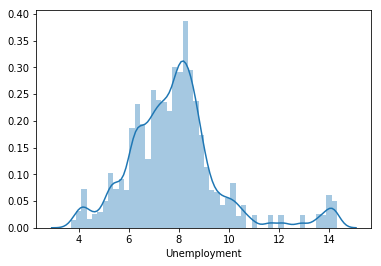

In [10]:
Unemployment = features[features.Unemployment.notnull()].Unemployment
sns.distplot(Unemployment)
plt.show()

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


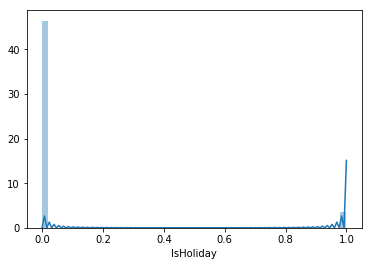

In [11]:
sns.distplot(features.IsHoliday)
plt.show()

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


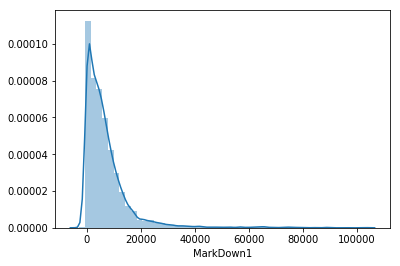

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


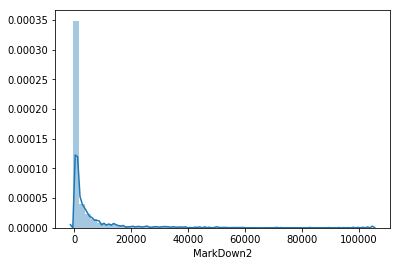

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


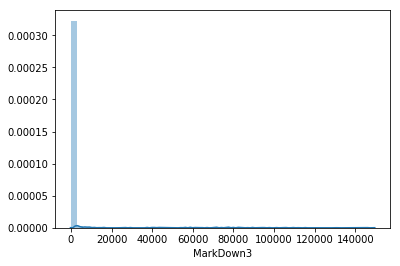

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


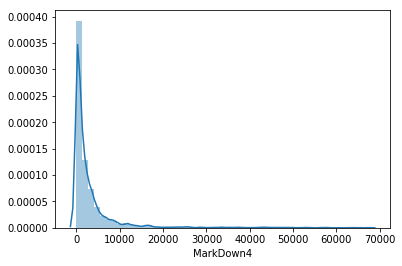

C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


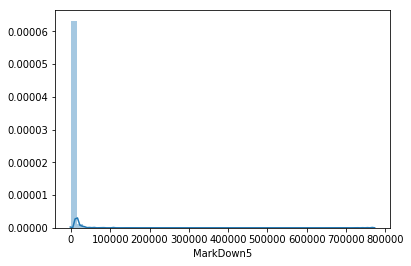

In [12]:
MarkDown1 = features[features.MarkDown1.notnull()].MarkDown1
sns.distplot(MarkDown1)
plt.show()
MarkDown2 = features[features.MarkDown2.notnull()].MarkDown2
sns.distplot(MarkDown2)
plt.show()
MarkDown3 = features[features.MarkDown3.notnull()].MarkDown3
sns.distplot(MarkDown3)
plt.show()
MarkDown4 = features[features.MarkDown4.notnull()].MarkDown4
sns.distplot(MarkDown4)
plt.show()
MarkDown5 = features[features.MarkDown5.notnull()].MarkDown5
sns.distplot(MarkDown5)
plt.show()

# stores

In [13]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


C:\Users\along\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


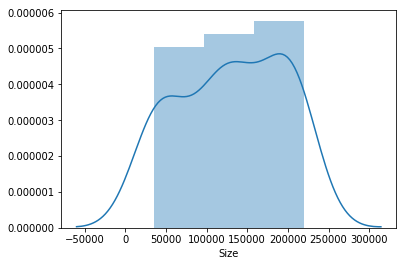

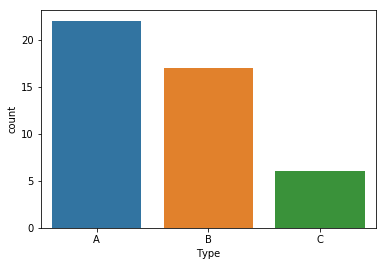

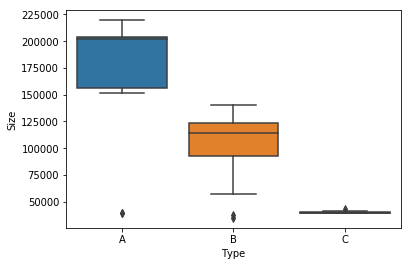

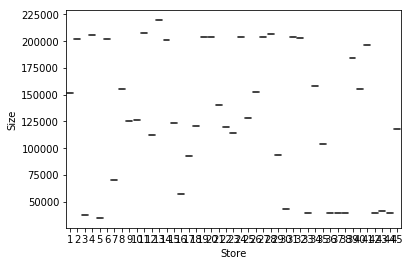

In [14]:
stores['Store'] = pd.Categorical(stores.Store)
stores['Type'] = pd.Categorical(stores.Type)

sns.distplot(stores.Size)
plt.show()

sns.countplot(x="Type", data=stores)
plt.show()

sns.boxplot(x="Type", y="Size", data=stores)
plt.show()

sns.boxplot(x="Store", y="Size", data=stores)
plt.show()

# training 

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [16]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [17]:
train = pd.read_csv("train.csv")   ##Run this first before you run below again
#Date = set(train.Date)
#print (sorted(Date))
#len(Date)
train.Date = pd.to_datetime(train.Date)
train.set_index('Date', inplace=True)

In [18]:
#train[['Weekly_Sales']].plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Date', fontsize=20)

# store = train.groupby(['Store','Dept'])
# store[['Weekly_Sales']].plot()
# plt.show()

We see that our training response variable is the Weekly_Sales variable from the train dataframe. We will need to combine these datasets in a later notebook, but for now we'll continue this exploration on the single datasets.

In [19]:
Dept = set(train.Dept)
print (sorted(Dept))
len(Dept)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


81

In [20]:
Store = set(train.Store)
print (sorted(Store))
len(Store)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


45

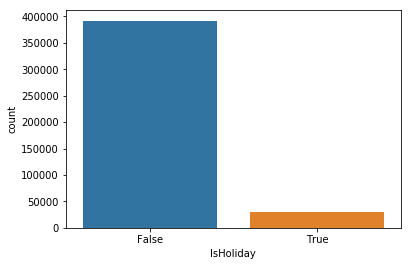

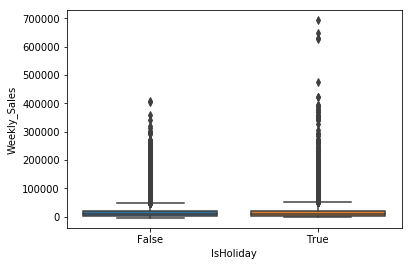

In [21]:
sns.countplot(x="IsHoliday", data=train)
plt.show()

sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=train)
plt.show()

## Next we review various descrptive statistics for the dataframes

In [22]:
features.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [23]:
stores.describe()

,Size
count,45.000000
mean,130287.600000
std,63825.271991
min,34875.000000
25%,70713.000000
50%,126512.000000
75%,202307.000000
max,219622.000000


In [24]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [25]:
#searching for missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
    
missing_values_table(features)

Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
MarkDown2,5269,64.3
MarkDown4,4726,57.7
MarkDown3,4577,55.9
MarkDown1,4158,50.8
MarkDown5,4140,50.5
CPI,585,7.1
Unemployment,585,7.1


In [26]:
missing_values_table(stores)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [27]:
missing_values_table(train)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


It looks like the features dataframe is the only one that has any missing values. We'll continue with distributions and graphs of our dataframes